# Simply Rational - ASSIGNMENT 1: Comparative Model Analysis
### Notebook created by: Jiacheng Yao, 09/02/2021



-------------
ASSIGNMENT 1: Comparative Model Analysis

Introduction
Attached to this email you will find two scientific papers describing two types of “simple algorithms” – Fast-And-Frugal Trees (Philipps et al, 2017) and Select-Regress-and-Round (Jung et al, 2020). Please include at least one of these models in your comparative model analysis.


The scenario
Many people struggle to get loans due to insufficient or non-existent credit histories. Unfortunately, this population is often taken advantage of by untrustworthy lenders and credit sharks. An organization strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. To make sure this underserved population has a positive loan experience, the organization makes use of a variety of alternative data—including telco and transactional information—to predict their clients' repayment abilities.

In addition, the organization currently operates in a country in which great economic and societal changes are taking place. Factors predictive of successful loan repayment or of loan default today may no longer be predictive a year from now. In order to be able to continue smooth operations during this time of upheaval, the organization wishes to also assess the effectiveness of simple and transparent algorithms. This would allow the employees of the organization to effectively evaluate the predictions made by the new system and integrate their knowledge of these societal and economic changes into the decision-making process.




Assessment of the task
Using ten-fold cross validation, determine the predictive accuracy (balanced accuracy BACC) with regards to TARGET in the main data set “application.csv”. Please use at least one of the simple models and compare it to the other models of your choice.

Your performance will be evaluated along two metrics:

1. Predictive accuracy of your best model.
2. A discussion regarding simplicity and interpretability of the simple models vs black box models and under which circumstances you would recommend the use of the simple models.

Please prepare the code as well as slides for a presentation that showcase your approach, the results and recommendations.

Data Description

1.  application.csv

    This is the main table.
    Static data for all applications. One row represents one loan in our data sample.

2.  bureau.csv

    All previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
    For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.
    There are more IDs in this file than in the “application.csv”-file. Please ignore those IDs that are not included in “application.csv”.

3.  columns_description.csv

    This file contains descriptions for the columns in the various data files.
    
## 1. Explorative Analysis

In [1]:
import logging

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import csv
sns.set_style('whitegrid')

logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.info("Start 1. Explorative Analysis")

INFO:root:Start 1. Explorative Analysis


### 1. Read the input data

In [2]:
df_app = pd.read_csv("application.csv")

df_bureau = pd.read_csv("bureau.csv", sep = ",")

df_col_des = pd.read_csv("columns_description.csv", encoding="ISO-8859-1")

### 2. Take a first look at the data - Application:

In [3]:
df_app.head(10)

SK_ID_CURR  TARGET  \
0  100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,...     NaN   
1                                             100003     0.0   
2                                             100004     0.0   
3                                             100006     0.0   
4                                             100007     0.0   
5  100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,2...     NaN   
6                                             100009     0.0   
7                                             100010     0.0   
8                                             100011     0.0   
9                                             100012     0.0   

  NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0                NaN         NaN          NaN             NaN           NaN   
1         Cash loans           F            N               N           0.0   
2    Revolving loans           M            Y               Y           0.0   
3         Cash loans           F            N               Y           0.0   
4         Cash loans           M            N               Y           0.0   
5                NaN         NaN          NaN             NaN           NaN   
6         Cash loans           F            Y               Y           1.0   
7         Cash loans           M            Y               Y           0.0   
8         Cash loans           F            N               Y           0.0   
9    Revolving loans           M            N               Y           0.0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  ...  FLAG_DOCUMENT_19  \
0               NaN         NaN          NaN  ...               NaN   
1          270000.0   1293502.5      35698.5  ...               0.0   
2           67500.0    135000.0       6750.0  ...               0.0   
3          135000.0    312682.5      29686.5  ...               0.0   
4          121500.0    513000.0      21865.5  ...               0.0   
5               NaN         NaN          NaN  ...               NaN   
6          171000.0   1560726.0      41301.0  ...               0.0   
7          360000.0   1530000.0      42075.0  ...               0.0   
8          112500.0   1019610.0      33826.5  ...               0.0   
9          135000.0    405000.0      20250.0  ...               0.0   

  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0              NaN              NaN                        NaN   
1              0.0              0.0                        0.0   
2              0.0              0.0                        0.0   
3              0.0              0.0                        NaN   
4              0.0              0.0                        0.0   
5              NaN              NaN                        NaN   
6              0.0              0.0                        0.0   
7              0.0              0.0                        0.0   
8              0.0              0.0                        0.0   
9              0.0              0.0                        NaN   

  AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       NaN                        NaN   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       NaN                        NaN   
4                       0.0                        0.0   
5                       NaN                        NaN   
6                       0.0                        0.0   
7                       0.0                        0.0   
8                       0.0                        0.0   
9                       NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        NaN                        NaN   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                       

**Comment**: _Some rows have been read incorrectly and need to be handled. random_number needs to be removed._

In [4]:
n_rows_old = df_app.shape[0]

# incorrectly read rows
df_app_p1 = df_app[df_app['TARGET'].isnull()]

# correctly read rows
df_app_p2 = df_app[df_app['TARGET'].notnull()]
del(df_app_p2['random_number'])

In [5]:
df_app_p1.iloc[:,0].to_csv("app_p1.csv", index=False, header=False)

In [6]:
df_app_p1 = pd.read_csv("app_p1.csv", sep=',', quotechar='"', escapechar='\\', header=None)

l_tmp = []
for l in  csv.reader(df_app_p1[0], quotechar='"', delimiter=',',
                     quoting=csv.QUOTE_ALL, skipinitialspace=True):
    l_tmp.append(l)

In [7]:
df_app_p1 = pd.DataFrame(l_tmp) 

In [8]:
df_app_p1.columns = df_app_p2.columns

In [9]:
# convert string to numeric if the data is numeric, otherwise keep original string version
for col in df_app_p1.columns:
    df_app_p1[col] = pd.to_numeric(df_app_p1[col], errors='ignore')
df_app_p1['TARGET'] = df_app_p1['TARGET'].astype(int)

In [10]:
df_app_p1.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100008       0         Cash loans           M            N   
2      100022       0    Revolving loans           F            N   
3      100024       0    Revolving loans           M            Y   
4      100030       0         Cash loans           F            N   
5      100040       0         Cash loans           F            N   
6      100041       0         Cash loans           F            N   
7      100045       0         Cash loans           F            N   
8      100047       1         Cash loans           M            N   
9      100060       0         Cash loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               Y             0           99000.0    490495.5      27517.5   
2               Y             0          112500.0    157500.0       7875.0   
3               Y             0          135000.0    427500.0      21375.0   
4               Y             0           90000.0    225000.0      11074.5   
5               Y             0          135000.0   1125000.0      32895.0   
6               N             0          112500.0    450000.0      44509.5   
7               Y             0           99000.0    247275.0      17338.5   
8               Y             0          202500.0   1193580.0      35028.0   
9               N             0           76500.0    454500.0      14661.0   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   
5  ...                 0                0                0                0   
6  ...                 0                0                0                0   
7  ...                 0                0                0                0   
8  ...                 0                0                0                0   
9  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   
5                        NaN                       NaN   
6                        0.0                       0.0   
7                        0.0                       0.0   
8                        0.0                       0.0   
9                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   
5                         NaN                        NaN   
6                         0.0                        0.0   
7                         0.0                        0.0   
8                         0.0                        2.0   
9                         0.0                        1.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        1.0                         1.0  
2                        0.0         

In [11]:
# combine all the data into one dataframe
df_app = pd.concat([df_app_p1, df_app_p2])

In [12]:
# make sure the one dataframe has the same number of rows as the original dataframe
assert(df_app.shape[0] == n_rows_old)

In [13]:
df_app.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0     100002     1.0         Cash loans           M            N   
1     100008     0.0         Cash loans           M            N   
2     100022     0.0    Revolving loans           F            N   
3     100024     0.0    Revolving loans           M            Y   
4     100030     0.0         Cash loans           F            N   
5     100040     0.0         Cash loans           F            N   
6     100041     0.0         Cash loans           F            N   
7     100045     0.0         Cash loans           F            N   
8     100047     1.0         Cash loans           M            N   
9     100060     0.0         Cash loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y           0.0          202500.0    406597.5      24700.5   
1               Y           0.0           99000.0    490495.5      27517.5   
2               Y           0.0          112500.0    157500.0       7875.0   
3               Y           0.0          135000.0    427500.0      21375.0   
4               Y           0.0           90000.0    225000.0      11074.5   
5               Y           0.0          135000.0   1125000.0      32895.0   
6               N           0.0          112500.0    450000.0      44509.5   
7               Y           0.0           99000.0    247275.0      17338.5   
8               Y           0.0          202500.0   1193580.0      35028.0   
9               N           0.0           76500.0    454500.0      14661.0   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...               0.0              0.0              0.0              0.0   
1  ...               0.0              0.0              0.0              0.0   
2  ...               0.0              0.0              0.0              0.0   
3  ...               0.0              0.0              0.0              0.0   
4  ...               0.0              0.0              0.0              0.0   
5  ...               0.0              0.0              0.0              0.0   
6  ...               0.0              0.0              0.0              0.0   
7  ...               0.0              0.0              0.0              0.0   
8  ...               0.0              0.0              0.0              0.0   
9  ...               0.0              0.0              0.0              0.0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   
5                        NaN                       NaN   
6                        0.0                       0.0   
7                        0.0                       0.0   
8                        0.0                       0.0   
9                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   
5                         NaN                        NaN   
6                         0.0                        0.0   
7                         0.0                        0.0   
8                         0.0                        2.0   
9                         0.0                        1.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        1.0                         1.0  
2                        0.0                   

In [14]:
df_app.shape

(276686, 122)

### 3. Take a first look at the data - Bureau:

In [15]:
df_bureau.head(10)

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   
5      215354       5714467        Active      currency 1         -273   
6      215354       5714468        Active      currency 1          -43   
7      162297       5714469        Closed      currency 1        -1896   
8      162297       5714470        Closed      currency 1        -1146   
9      162297       5714471        Active      currency 1        -1146   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   
5                   0              27460.0                NaN   
6                   0                 79.0                NaN   
7                   0              -1684.0            -1710.0   
8                   0               -811.0             -840.0   
9                   0               -484.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0        91323.00   
1                     NaN                   0       225000.00   
2                     NaN                   0       464323.50   
3                     NaN                   0        90000.00   
4                 77674.5                   0      2700000.00   
5                     0.0                   0       180000.00   
6                     0.0                   0        42103.80   
7                 14985.0                   0        76878.45   
8                     0.0                   0       103007.70   
9                     0.0                   0         4500.00   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                 0.00                   NaN                     0.0   
1            171342.00                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   
5             71017.38             108982.62                     0.0   
6             42103.80                  0.00                     0.0   
7                 0.00                  0.00                     0.0   
8                 0.00                  0.00                     0.0   
9                 0.00                  0.00                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN  
5      Credit card                 -31          NaN  
6  Consumer credit                 -22          NaN  
7  Consumer credit               -1710          NaN  
8  Consumer credit                -840          NaN  
9      Credit card                -690          NaN

In [16]:
df_bureau.shape

(1716428, 17)

### 4. Take a first look at the data - Column Description:

In [17]:
df_col_des.head(10)

Unnamed: 0            Table  \
0                                                  1  application.csv   
1  2,application.csv,TARGET,"Target variable (1 -...              NaN   
2                                                  5  application.csv   
3                                                  6  application.csv   
4                                                  7  application.csv   
5                                                  8  application.csv   
6                                                  9  application.csv   
7                                                 10  application.csv   
8                                                 11  application.csv   
9                                                 12  application.csv   

                  Row                                  Description Special  
0          SK_ID_CURR                     ID of loan in our sample     NaN  
1                 NaN                                          NaN     NaN  
2  NAME_CONTRACT_TYPE  Identification if loan is cash or revolving     NaN  
3         CODE_GENDER                         Gender of the client     NaN  
4        FLAG_OWN_CAR                Flag if the client owns a car     NaN  
5     FLAG_OWN_REALTY          Flag if client owns a house or flat     NaN  
6        CNT_CHILDREN            Number of children the client has     NaN  
7    AMT_INCOME_TOTAL                         Income of the client     NaN  
8          AMT_CREDIT                    Credit amount of the loan     NaN  
9         AMT_ANNUITY                                 Loan annuity     NaN

**Comment**: _Like application data, some rows have been read incorrectly and need to be handled._

In [18]:
n_rows_old = df_col_des.shape[0]

# incorrectly read rows
df_col_des_p1 = df_col_des[df_col_des['Table'].isnull()]

# correctly read rows
df_col_des_p2 = df_col_des[df_col_des['Table'].notnull()]

df_col_des_p2.columns = ['Row_ID' if x==df_col_des.columns[0] else x for x in df_col_des_p2.columns]

In [19]:
df_col_des_p2.head(10)

Row_ID            Table                 Row  \
0       1  application.csv          SK_ID_CURR   
2       5  application.csv  NAME_CONTRACT_TYPE   
3       6  application.csv         CODE_GENDER   
4       7  application.csv        FLAG_OWN_CAR   
5       8  application.csv     FLAG_OWN_REALTY   
6       9  application.csv        CNT_CHILDREN   
7      10  application.csv    AMT_INCOME_TOTAL   
8      11  application.csv          AMT_CREDIT   
9      12  application.csv         AMT_ANNUITY   
10     13  application.csv     AMT_GOODS_PRICE   

                                          Description Special  
0                            ID of loan in our sample     NaN  
2         Identification if loan is cash or revolving     NaN  
3                                Gender of the client     NaN  
4                       Flag if the client owns a car     NaN  
5                 Flag if client owns a house or flat     NaN  
6                   Number of children the client has     NaN  
7                                Income of the client     NaN  
8                           Credit amount of the loan     NaN  
9                                        Loan annuity     NaN  
10  For consumer loans it is the price of the good...     NaN

In [20]:
# reformat incorrectly read rows
df_col_des_p1= df_col_des_p1.iloc[:,0].str.split(',', 3, expand=True)
df_col_des_p1['Special'] = np.nan
df_col_des_p1.columns = df_col_des_p2.columns

In [21]:
df_col_des_p1.head(10)

Row_ID            Table                   Row  \
1       2  application.csv                TARGET   
12     15  application.csv      NAME_INCOME_TYPE   
15     18  application.csv     NAME_HOUSING_TYPE   
22     25  application.csv            FLAG_MOBIL   
23     26  application.csv        FLAG_EMP_PHONE   
24     27  application.csv       FLAG_WORK_PHONE   
25     28  application.csv      FLAG_CONT_MOBILE   
26     29  application.csv            FLAG_PHONE   
27     30  application.csv            FLAG_EMAIL   
30     33  application.csv  REGION_RATING_CLIENT   

                                          Description  Special  
1   "Target variable (1 - client with payment diff...      NaN  
12  "Clients income type (businessman, working, ma...      NaN  
15  "What is the housing situation of the client (...      NaN  
22   "Did client provide mobile phone (1=YES, 0=NO)",      NaN  
23     "Did client provide work phone (1=YES, 0=NO)",      NaN  
24     "Did client provide home phone (1=YES, 0=NO)",      NaN  
25        "Was mobile phone reachable (1=YES, 0=NO)",      NaN  
26     "Did client provide home phone (1=YES, 0=NO)",      NaN  
27          "Did client provide email (1=YES, 0=NO)",      NaN  
30  "Our rating of the region where client lives (...      NaN

In [22]:
# combine all the data into one dataframe
df_col_des = pd.concat([df_col_des_p1, df_col_des_p2])
df_col_des['Row_ID'] = pd.to_numeric(df_col_des['Row_ID'], errors='ignore')
df_col_des.sort_values(by='Row_ID', ascending=True, inplace=True)

In [23]:
# make sure the one dataframe has the same number of rows as the original dataframe
assert(df_col_des.shape[0] == n_rows_old)

In [24]:
df_col_des.head(10)

Row_ID            Table                 Row  \
0       1  application.csv          SK_ID_CURR   
1       2  application.csv              TARGET   
2       5  application.csv  NAME_CONTRACT_TYPE   
3       6  application.csv         CODE_GENDER   
4       7  application.csv        FLAG_OWN_CAR   
5       8  application.csv     FLAG_OWN_REALTY   
6       9  application.csv        CNT_CHILDREN   
7      10  application.csv    AMT_INCOME_TOTAL   
8      11  application.csv          AMT_CREDIT   
9      12  application.csv         AMT_ANNUITY   

                                         Description Special  
0                           ID of loan in our sample     NaN  
1  "Target variable (1 - client with payment diff...     NaN  
2        Identification if loan is cash or revolving     NaN  
3                               Gender of the client     NaN  
4                      Flag if the client owns a car     NaN  
5                Flag if client owns a house or flat     NaN  
6                  Number of children the client has     NaN  
7                               Income of the client     NaN  
8                          Credit amount of the loan     NaN  
9                                       Loan annuity     NaN

In [25]:
df_col_des.to_csv("columns_description(cleaned).csv", index = False)

### 5. Summarize the dataframe

In [26]:
df_app.describe([.1,.2,.3,.6,.7,.8,.9,.95,.98,.99,.999])

TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  276686.000000  276686.000000      2.766860e+05  2.766860e+05   
mean        0.080824       0.416013      1.688559e+05  5.987201e+05   
std         0.272566       0.719639      2.471935e+05  4.024394e+05   
min         0.000000       0.000000      2.565000e+04  4.500000e+04   
10%         0.000000       0.000000      8.100000e+04  1.800000e+05   
20%         0.000000       0.000000      9.900000e+04  2.547000e+05   
30%         0.000000       0.000000      1.125000e+05  3.060000e+05   
50%         0.000000       0.000000      1.485000e+05  5.130000e+05   
60%         0.000000       0.000000      1.620000e+05  6.041520e+05   
70%         0.000000       0.000000      1.800000e+05  7.551900e+05   
80%         0.000000       1.000000      2.250000e+05  9.000000e+05   
90%         0.000000       2.000000      2.700000e+05  1.133748e+06   
95%         1.000000       2.000000      3.375000e+05  1.350000e+06   
98%         1.000000       2.000000      4.275000e+05  1.661000e+06   
99%         1.000000       3.000000      4.725000e+05  1.847700e+06   
99.9%       1.000000       4.000000      9.000000e+05  2.517300e+06   
max         1.000000      14.000000      1.170000e+08  4.050000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count  276675.000000     2.764270e+05               276686.000000   
mean    27100.156769     5.381233e+05                    0.020878   
std     14490.114074     3.693735e+05                    0.013840   
min      1615.500000     4.050000e+04                    0.000290   
10%     11070.000000     1.800000e+05                    0.006629   
20%     14679.000000     2.250000e+05                    0.008625   
30%     18157.500000     2.700000e+05                    0.010643   
50%     24898.500000     4.500000e+05                    0.018850   
60%     28062.000000     5.220000e+05                    0.020713   
70%     32017.500000     6.750000e+05                    0.025164   
80%     37534.500000     8.145000e+05                    0.030755   
90%     45954.000000     1.093500e+06                    0.035792   
95%     53325.000000     1.305000e+06                    0.046220   
98%     62950.500000     1.575000e+06                    0.072508   
99%     69912.000000     1.800000e+06                    0.072508   
99.9%  110047.500000     2.250000e+06                    0.072508   
max    258025.500000     4.050000e+06                    0.072508   

          DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  ...  FLAG_DOCUMENT_18  \
count  276686.000000  276686.000000       276686.00000  ...     276686.000000   
mean   -16040.456373   63966.154077        -4986.04817  ...          0.008092   
std      4365.533985  141401.435173         3522.70522  ...          0.089592   
min    -25229.000000  -17912.000000       -23738.00000  ...          0.000000   
10%    -22184.000000   -4884.500000        -9930.00000  ...          0.000000   
20%    -20482.000000   -3231.000000        -8233.00000  ...          0.000000   
30%    -18890.000000   -2359.000000        -6777.00000  ...          0.000000   
50%    -15754.000000   -1212.000000        -4501.00000  ...          0.000000   
60%    -14420.000000    -820.000000        -3536.00000  ...          0.000000   
70%    -13140.000000    -456.000000        -2540.00000  ...          0.000000   
80%    -11694.000000    -143.000000        -1492.00000  ...          0.000000   
90%    -10285.000000  365243.000000         -690.00000  ...          0.000000   
95%     -9412.000000  365243.000000         -330.00000  ...          0.000000   
98%     -8567.000000  365243.000000         -118.00000  ...          0.000000   
99%     -8265.000000  365243.000000          -50.00000  ...          0.000000   
99.9%   -7760.000000  365243.000000           -3.00000  ...          1.000000   
max     -7489.000000  365243.000000            0.00000  ...          1.000000   

       FLAG_DOCUMENT_19  FLAG_DOC

In [27]:
df_app['TARGET'].describe([.1,.2,.3,.6,.7,.8,.9,.95,.98,.99,.999])

count    276686.000000
mean          0.080824
std           0.272566
min           0.000000
10%           0.000000
20%           0.000000
30%           0.000000
50%           0.000000
60%           0.000000
70%           0.000000
80%           0.000000
90%           0.000000
95%           1.000000
98%           1.000000
99%           1.000000
99.9%         1.000000
max           1.000000
Name: TARGET, dtype: float64

In [42]:
def plot_general_dist(df, col, title=None, outfile=None):
    # plot general histogram
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)
    if title is not None:
        sns.distplot(df[col]).set_title(title)
    if outfile is not None:
        plt.savefig(outfile)
        
def plot_general_line(df, col_x, col_y, title=None, outfile=None):
    # plot general histogram
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)
    if title is not None:
        sns.lineplot(x=col_x, y=col_y, data=df).set_title(title)
    if outfile is not None:
        plt.savefig(outfile)
        
def plot_comparison_dist(l_dfs, col, l_labels, title=None, outfile=None):
    # plot comparison histogram
    # len(l_dfs) and len(l_labels) need to be the same
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)

    for i in range(len(l_dfs)):
        sns.distplot(l_dfs[i][col], hist=False, rug=False, label=l_labels[i]).set_title(title)
    
    if outfile is not None:
        plt.savefig(outfile)
        
def plot_general_bar(df, group_col, agg_col, title=None, outfile=None, rotation=0):
    # plot general barplot
    df_grouped = df.groupby([group_col]).agg({agg_col:'count'}).reset_index()

    fig, axis = plt.subplots(1,1,figsize=(15, 7))

    sns.barplot(x=group_col, y=agg_col, data=df_grouped, order=df_grouped[group_col].unique(), ax=axis)
    axis.set_xticks(range(len(df_grouped[group_col].unique())))
    axis.set_xticklabels(df_grouped[group_col].unique(), rotation=rotation)
    
    if title is not None:
        axis.set_title(title)
    if outfile is not None:
        plt.savefig(outfile)
        
def plot_comparison_bar(df, group_col, agg_col, hue_col, title=None, outfile=None):
    df_grouped_by_col = df.groupby([group_col, hue_col]).agg({agg_col:'count'}).reset_index()

    g = sns.catplot(x=group_col, y=agg_col, hue=hue_col, data=df_grouped_by_col,
                    kind="bar", palette="muted", height=6, aspect=2)
    g.despine(left=True)
    g.set_ylabels("Count")
    
    if title is not None:
        g.fig.suptitle(title)
    if outfile is not None:
        g.fig.savefig(outfile)

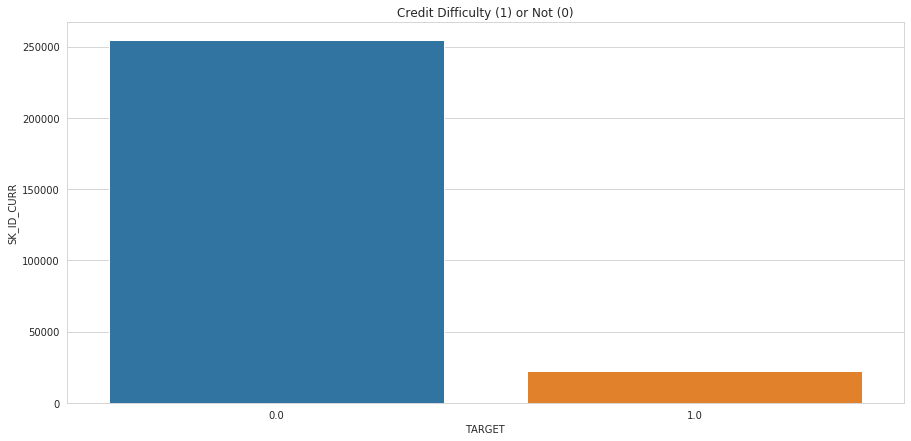

In [45]:
# plot the distribution of TARGET
plot_general_bar(df_merged, 'TARGET', 'SK_ID_CURR', title='Credit Difficulty (1) or Not (0)', outfile='target_bar.png')

In [28]:
df_bureau.describe([.1,.2,.3,.6,.7,.8,.9,.95,.98,.99,.999])

SK_ID_CURR  SK_ID_BUREAU   DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
count  1.716428e+06  1.716428e+06  1.716428e+06        1.716428e+06   
mean   2.782149e+05  5.924434e+06 -1.142108e+03        8.181666e-01   
std    1.029386e+05  5.322657e+05  7.951649e+02        3.654443e+01   
min    1.000010e+05  5.000000e+06 -2.922000e+03        0.000000e+00   
10%    1.356020e+05  5.184875e+06 -2.443000e+03        0.000000e+00   
20%    1.712200e+05  5.370915e+06 -1.879000e+03        0.000000e+00   
30%    2.067270e+05  5.556600e+06 -1.501000e+03        0.000000e+00   
50%    2.780550e+05  5.926304e+06 -9.870000e+02        0.000000e+00   
60%    3.140000e+05  6.109587e+06 -7.640000e+02        0.000000e+00   
70%    3.495490e+05  6.293764e+06 -5.670000e+02        0.000000e+00   
80%    3.852510e+05  6.477206e+06 -3.850000e+02        0.000000e+00   
90%    4.209640e+05  6.660630e+06 -2.150000e+02        0.000000e+00   
95%    4.386320e+05  6.751975e+06 -1.250000e+02        0.000000e+00   
98%    4.491970e+05  6.806619e+06 -6.300000e+01        0.000000e+00   
99%    4.527440e+05  6.825134e+06 -3.800000e+01        0.000000e+00   
99.9%  4.559060e+05  6.841617e+06 -1.000000e+01        5.257300e+01   
max    4.562550e+05  6.843457e+06  0.000000e+00        2.792000e+03   

       DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
count         1.610875e+06       1.082775e+06            5.919400e+05   
mean          5.105174e+02      -1.017437e+03            3.825418e+03   
std           4.994220e+03       7.140106e+02            2.060316e+05   
min          -4.206000e+04      -4.202300e+04            0.000000e+00   
10%          -1.922000e+03      -2.159000e+03            0.000000e+00   
20%          -1.357000e+03      -1.677000e+03            0.000000e+00   
30%          -9.530000e+02      -1.325000e+03            0.000000e+00   
50%          -3.300000e+02      -8.970000e+02            0.000000e+00   
60%          -5.900000e+01      -6.990000e+02            0.000000e+00   
70%           2.480000e+02      -5.110000e+02            0.000000e+00   
80%           7.250000e+02      -3.400000e+02            4.500000e+01   
90%           1.334000e+03      -1.780000e+02            7.594875e+03   
95%           2.623000e+03      -9.400000e+01            1.422045e+04   
98%           2.748500e+04      -4.200000e+01            2.704515e+04   
99%           3.102900e+04      -2.400000e+01            4.198875e+04   
99.9%         3.118400e+04      -5.000000e+00            2.113242e+05   
max           3.119900e+04       0.000000e+00            1.159872e+08   

       CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
count        1.716428e+06    1.716415e+06         1.458759e+06   
mean         6.410406e-03    3.549946e+05         1.370851e+05   
std          9.622391e-02    1.149811e+06         6.774011e+05   
min          0.000000e+00    0.000000e+00        -4.705600e+06   
10%          0.000000e+00    2.250000e+04         0.000000e+00   
20%          0.000000e+00    4.276260e+04         0.000000e+00   
30%          0.000000e+00    6.511950e+04         0.000000e+00   
50%          0.000000e+00    1.255185e+05         0.000000e+00   
60%          0.000000e+00    1.715850e+05         0.000000e+00   
70%          0.000000e+00    2.392650e+05         0.000000e+00   
80%          0.000000e+00    4.230000e+05         9.000900e+04   
90%          0.000000e+00    7.787547e+05         2.954565e+05   
95%          0.000000e+00    1.350000e+06         6.289024e+05   
98%          0.000000e+00    2.392271e+06         1.352791e+06   
99%          0.000000e+00    3.700916e+06         2.259728e+06   
99.9%        1.000000e+00    1.102100e+07         8.841942e+06   
max          9.000000e+00    5.850000e+08         1.701000e+08   

       AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  DAYS_CREDIT_UPDATE  \
count          1.124648e+06            1.716428e+06        1.716428e+06   
mean           6.229515e+03            3.791276e+01       -5.937483e+02   
s

## 2. Preprocessing

### 1. Focus on bureau data first and turn it into features for application

In [29]:
def most_common(series):
    return series.value_counts().index[0]

In [30]:
df_bureau_grouped = df_bureau.groupby(['SK_ID_CURR']).agg({'CREDIT_ACTIVE': most_common, 
                                                           'CREDIT_CURRENCY': most_common, 
                                                           'DAYS_CREDIT': 'median', 
                                                           'CREDIT_DAY_OVERDUE': 'median', 
                                                           'DAYS_CREDIT_ENDDATE': 'median', 
                                                           'DAYS_ENDDATE_FACT': 'median', 
                                                           'AMT_CREDIT_MAX_OVERDUE': 'median', 
                                                           'CNT_CREDIT_PROLONG': 'median', 
                                                           'AMT_CREDIT_SUM': 'median', 
                                                           'AMT_CREDIT_SUM_DEBT': 'median', 
                                                           'AMT_CREDIT_SUM_LIMIT': 'median', 
                                                           'AMT_CREDIT_SUM_OVERDUE': 'median',
                                                           'CREDIT_TYPE': most_common, 
                                                           'DAYS_CREDIT_UPDATE': 'median', 
                                                           'AMT_ANNUITY': 'median'}).reset_index()

In [31]:
df_bureau_grouped.head()

SK_ID_CURR CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
0      100001        Closed      currency 1       -857.0                 0.0   
1      100002        Closed      currency 1      -1042.5                 0.0   
2      100003        Closed      currency 1      -1205.5                 0.0   
3      100004        Closed      currency 1       -867.0                 0.0   
4      100005        Active      currency 1       -137.0                 0.0   

   DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
0               -179.0             -715.0                     NaN   
1               -424.5             -939.0                    40.5   
2               -480.0             -621.0                     0.0   
3               -488.5             -532.5                     0.0   
4                122.0             -123.0                     0.0   

   CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
0                 0.0       168345.00                  0.0   
1                 0.0        54130.50                  0.0   
2                 0.0        92576.25                  0.0   
3                 0.0        94518.90                  0.0   
4                 0.0        58500.00              25321.5   

   AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE      CREDIT_TYPE  \
0                   0.0                     0.0  Consumer credit   
1                   0.0                     0.0      Credit card   
2                   0.0                     0.0      Credit card   
3                   0.0                     0.0  Consumer credit   
4                   0.0                     0.0  Consumer credit   

   DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0              -155.0          0.0  
1              -402.5          0.0  
2              -545.0          NaN  
3              -532.0          NaN  
4               -31.0          0.0

### 2. Merge application and bureau data

In [32]:
df_merged = df_app.merge(df_bureau_grouped, on='SK_ID_CURR', how='left', suffixes=('', '_BUREAU'))

In [33]:
df_merged.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0     100002     1.0         Cash loans           M            N   
1     100008     0.0         Cash loans           M            N   
2     100022     0.0    Revolving loans           F            N   
3     100024     0.0    Revolving loans           M            Y   
4     100030     0.0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y           0.0          202500.0    406597.5      24700.5   
1               Y           0.0           99000.0    490495.5      27517.5   
2               Y           0.0          112500.0    157500.0       7875.0   
3               Y           0.0          135000.0    427500.0      21375.0   
4               Y           0.0           90000.0    225000.0      11074.5   

   ...  DAYS_ENDDATE_FACT AMT_CREDIT_MAX_OVERDUE CNT_CREDIT_PROLONG  \
0  ...             -939.0                   40.5                0.0   
1  ...             -909.0                    0.0                0.0   
2  ...                NaN                    0.0                0.0   
3  ...                NaN                    NaN                NaN   
4  ...             -598.0                    0.0                0.0   

  AMT_CREDIT_SUM AMT_CREDIT_SUM_DEBT AMT_CREDIT_SUM_LIMIT  \
0      54130.500                 0.0                  0.0   
1     105705.000                 0.0                  0.0   
2     528750.000            205276.5                  0.0   
3            NaN                 NaN                  NaN   
4      33487.785                 0.0                  0.0   

   AMT_CREDIT_SUM_OVERDUE      CREDIT_TYPE  DAYS_CREDIT_UPDATE  \
0                     0.0      Credit card              -402.5   
1                     0.0  Consumer credit              -790.0   
2                     0.0  Consumer credit               -28.0   
3                     NaN              NaN                 NaN   
4                     0.0  Consumer credit              -244.0   

   AMT_ANNUITY_BUREAU  
0                 0.0  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  

[5 rows x 137 columns]

In [34]:
df_merged.to_csv("app_merged.csv", index = False)

### 3. Correlation and remove columns with high correlation

In [35]:
corr = df_merged.corr()
corr.style.background_gradient(cmap='coolwarm')

/home/yao/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


In [36]:
def corr_handler(df, threshold1, threshold2):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold1) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in df.columns:
                    del df[colname] # deleting the column from the dataset
            if (corr_matrix.iloc[i, j] <= threshold2) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in df.columns:
                    del df[colname] # deleting the column from the dataset

    return df

df_merged =  corr_handler(df_merged, 0.85, -0.85)

In [37]:
df_merged.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0     100002     1.0         Cash loans           M            N   
1     100008     0.0         Cash loans           M            N   
2     100022     0.0    Revolving loans           F            N   
3     100024     0.0    Revolving loans           M            Y   
4     100030     0.0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y           0.0          202500.0    406597.5      24700.5   
1               Y           0.0           99000.0    490495.5      27517.5   
2               Y           0.0          112500.0    157500.0       7875.0   
3               Y           0.0          135000.0    427500.0      21375.0   
4               Y           0.0           90000.0    225000.0      11074.5   

   ... DAYS_ENDDATE_FACT AMT_CREDIT_MAX_OVERDUE CNT_CREDIT_PROLONG  \
0  ...            -939.0                   40.5                0.0   
1  ...            -909.0                    0.0                0.0   
2  ...               NaN                    0.0                0.0   
3  ...               NaN                    NaN                NaN   
4  ...            -598.0                    0.0                0.0   

  AMT_CREDIT_SUM AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  \
0      54130.500                 0.0                   0.0   
1     105705.000                 0.0                   0.0   
2     528750.000            205276.5                   0.0   
3            NaN                 NaN                   NaN   
4      33487.785                 0.0                   0.0   

   AMT_CREDIT_SUM_OVERDUE      CREDIT_TYPE  DAYS_CREDIT_UPDATE  \
0                     0.0      Credit card              -402.5   
1                     0.0  Consumer credit              -790.0   
2                     0.0  Consumer credit               -28.0   
3                     NaN              NaN                 NaN   
4                     0.0  Consumer credit              -244.0   

   AMT_ANNUITY_BUREAU  
0                 0.0  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  

[5 rows x 99 columns]

### 4. Check if there are missing values in the columns:

In [38]:
# Check if there are missing values in the columns:
def missing_value_checker(df):
    for col in df.columns:
        tmp_flag = 'Numerical'
        if df[col].dtype == object:
            tmp_flag = 'Categorical'
        logging.info('{}: {} ({})'.format(col, str(df[col].isnull().sum()/float(df.shape[0])), tmp_flag))

In [39]:
missing_value_checker(df_merged)

INFO:root:SK_ID_CURR: 0.0 (Categorical)
INFO:root:TARGET: 0.0 (Numerical)
INFO:root:NAME_CONTRACT_TYPE: 0.0 (Categorical)
INFO:root:CODE_GENDER: 0.0 (Categorical)
INFO:root:FLAG_OWN_CAR: 0.0 (Categorical)
INFO:root:FLAG_OWN_REALTY: 0.0 (Categorical)
INFO:root:CNT_CHILDREN: 0.0 (Numerical)
INFO:root:AMT_INCOME_TOTAL: 0.0 (Numerical)
INFO:root:AMT_CREDIT: 0.0 (Numerical)
INFO:root:AMT_ANNUITY: 3.975625799642916e-05 (Numerical)
INFO:root:NAME_TYPE_SUITE: 0.0032202568977107624 (Categorical)
INFO:root:NAME_INCOME_TYPE: 0.0 (Categorical)
INFO:root:NAME_EDUCATION_TYPE: 0.0 (Categorical)
INFO:root:NAME_FAMILY_STATUS: 0.0 (Categorical)
INFO:root:NAME_HOUSING_TYPE: 0.0 (Categorical)
INFO:root:REGION_POPULATION_RELATIVE: 0.0 (Numerical)
INFO:root:DAYS_BIRTH: 0.0 (Numerical)
INFO:root:DAYS_EMPLOYED: 0.0 (Numerical)
INFO:root:DAYS_REGISTRATION: 0.0 (Numerical)
INFO:root:DAYS_ID_PUBLISH: 0.0 (Numerical)
INFO:root:OWN_CAR_AGE: 0.6599466543301793 (Numerical)
INFO:root:FLAG_MOBIL: 0.0 (Numerical)
INFO:

**Comment**: _Missing Data in the dataframe found, attention needed._

### 5. See how many unique values there are for each column:

In [40]:
# See how many unique values there are for each columns, and if there is only one unique value, we drop the column
def unique_value_printer(df):
    cols_to_drop = []
    for col in df.columns:
        tmp_num_unique = len(df[col].unique())
        tmp_flag = 'Numerical'
        if df[col].dtype == object:
            tmp_flag = 'Categorical'
        logging.info('{}: {} ({})'.format(col, str(tmp_num_unique), tmp_flag))
        if (tmp_num_unique==1):
            cols_to_drop.append(col)
    df.drop(cols_to_drop, 1, inplace=True)

In [41]:
unique_value_printer(df_merged)

INFO:root:SK_ID_CURR: 276686 (Categorical)
INFO:root:TARGET: 2 (Numerical)
INFO:root:NAME_CONTRACT_TYPE: 2 (Categorical)
INFO:root:CODE_GENDER: 3 (Categorical)
INFO:root:FLAG_OWN_CAR: 2 (Categorical)
INFO:root:FLAG_OWN_REALTY: 2 (Categorical)
INFO:root:CNT_CHILDREN: 14 (Numerical)
INFO:root:AMT_INCOME_TOTAL: 2348 (Numerical)
INFO:root:AMT_CREDIT: 5439 (Numerical)
INFO:root:AMT_ANNUITY: 13418 (Numerical)
INFO:root:NAME_TYPE_SUITE: 9 (Categorical)
INFO:root:NAME_INCOME_TYPE: 8 (Categorical)
INFO:root:NAME_EDUCATION_TYPE: 5 (Categorical)
INFO:root:NAME_FAMILY_STATUS: 6 (Categorical)
INFO:root:NAME_HOUSING_TYPE: 6 (Categorical)
INFO:root:REGION_POPULATION_RELATIVE: 95 (Numerical)
INFO:root:DAYS_BIRTH: 17436 (Numerical)
INFO:root:DAYS_EMPLOYED: 12338 (Numerical)
INFO:root:DAYS_REGISTRATION: 15564 (Numerical)
INFO:root:DAYS_ID_PUBLISH: 6154 (Numerical)
INFO:root:OWN_CAR_AGE: 63 (Numerical)
INFO:root:FLAG_MOBIL: 2 (Numerical)
INFO:root:FLAG_WORK_PHONE: 2 (Numerical)
INFO:root:FLAG_CONT_MOBILE

**Comment**: _The categorical features don't have high number of unique values, we can use one hot key to do encoding._

### 6. Handling of features with high percentage of missing values or with outliers

**Comment**: _Most of the missing values will be filled with imputation._

#### 1.OWN_CAR_AGE

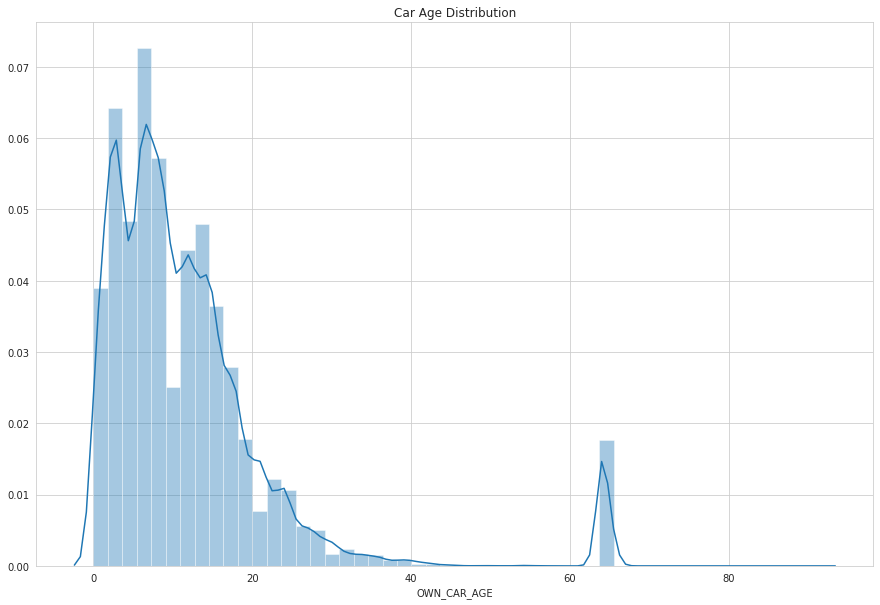

In [46]:
# plot the distribution of car age
plot_general_dist(df_merged, 'OWN_CAR_AGE', 'Car Age Distribution', 'car_age_dist.png')

In [47]:
df_merged['OWN_CAR_AGE'].describe([.1,.2,.3,.6,.7,.8,.9,.95,.98,.99,.999])

count    94088.000000
mean        12.066246
std         11.966284
min          0.000000
10%          2.000000
20%          4.000000
30%          6.000000
50%          9.000000
60%         12.000000
70%         14.000000
80%         17.000000
90%         22.000000
95%         30.000000
98%         64.000000
99%         64.000000
99.9%       65.000000
max         91.000000
Name: OWN_CAR_AGE, dtype: float64

In [48]:
# people without OWN_CAR_AGE info will receive 200 as OWN_CAR_AGE as a signal
df_merged.loc[df_merged['OWN_CAR_AGE']>0, "OWN_CAR_AGE"] = 200

#### 2. DAYS_BIRTH

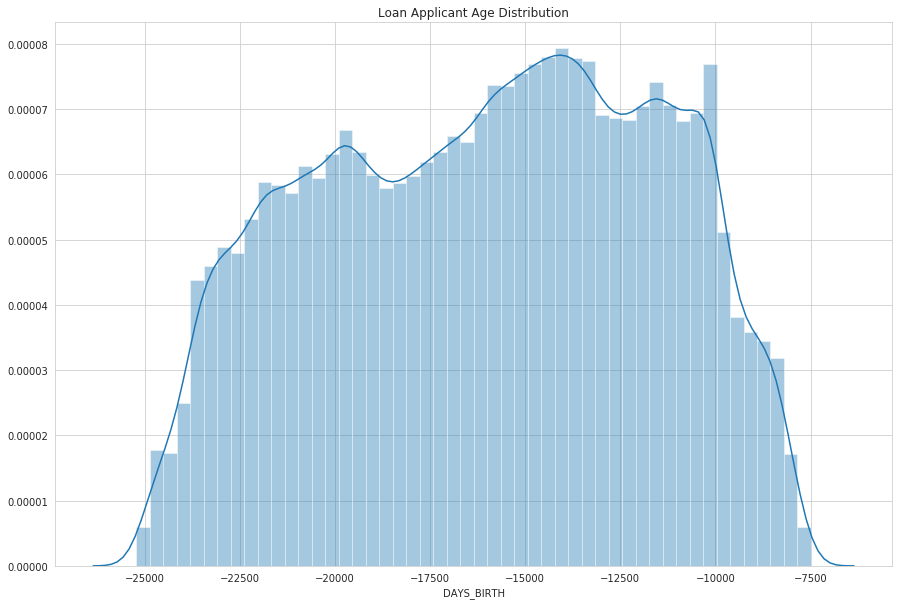

In [49]:
# plot the distribution of loan application age
plot_general_dist(df_merged, 'DAYS_BIRTH', 'Loan Applicant Age Distribution', 'days_birth_dist.png')

In [50]:
df_merged['DAYS_BIRTH'].describe([.1,.2,.3,.6,.7,.8,.9,.95,.98,.99,.999])

count    276686.000000
mean     -16040.456373
std        4365.533985
min      -25229.000000
10%      -22184.000000
20%      -20482.000000
30%      -18890.000000
50%      -15754.000000
60%      -14420.000000
70%      -13140.000000
80%      -11694.000000
90%      -10285.000000
95%       -9412.000000
98%       -8567.000000
99%       -8265.000000
99.9%     -7760.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

**Comment**: _Age cannot be negative. I will set all as absolute_

In [51]:
df_merged['DAYS_BIRTH'] = df_merged['DAYS_BIRTH'].abs()

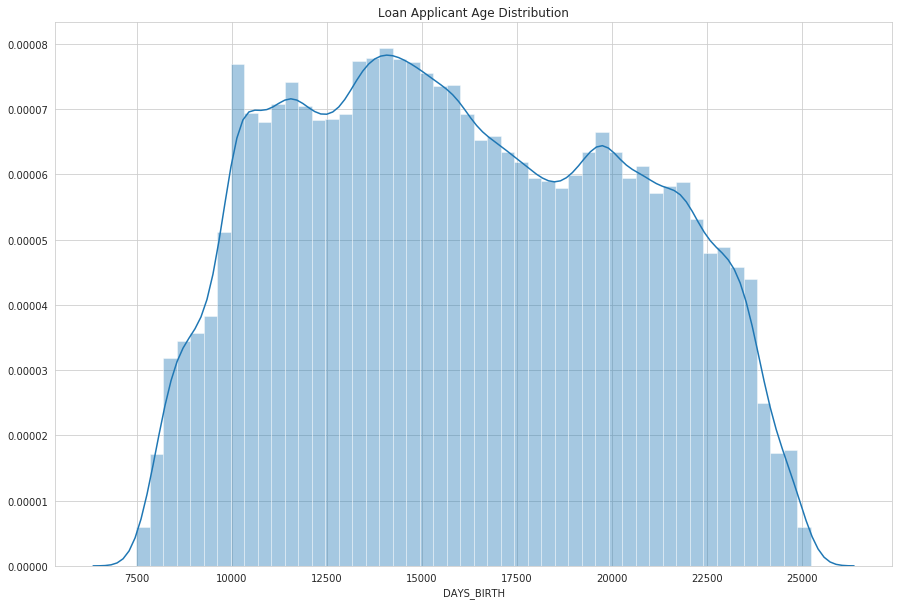

In [52]:
# plot the distribution of loan application age
plot_general_dist(df_merged, 'DAYS_BIRTH', 'Loan Applicant Age Distribution', 'days_birth_dist(cleaned).png')

#### 3. DAYS_EMPLOYED

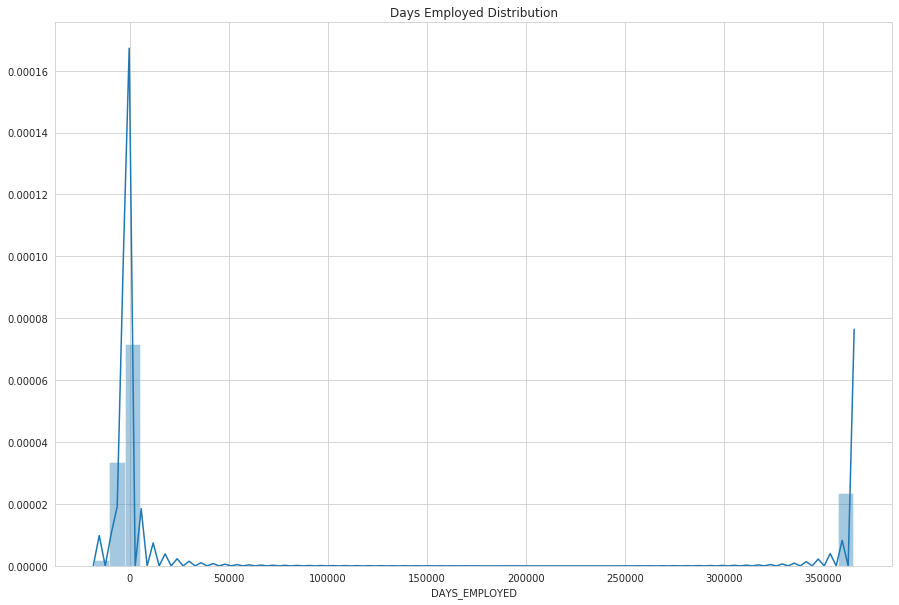

In [53]:
# plot the distribution of days employed
plot_general_dist(df_merged, 'DAYS_EMPLOYED', 'Days Employed Distribution', 'days_employed_dist.png')

In [54]:
df_merged['DAYS_EMPLOYED'].describe([.1,.2,.3,.6,.7,.8,.9,.95,.98,.99,.999])

count    276686.000000
mean      63966.154077
std      141401.435173
min      -17912.000000
10%       -4884.500000
20%       -3231.000000
30%       -2359.000000
50%       -1212.000000
60%        -820.000000
70%        -456.000000
80%        -143.000000
90%      365243.000000
95%      365243.000000
98%      365243.000000
99%      365243.000000
99.9%    365243.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [55]:
df_merged[df_merged['DAYS_EMPLOYED']>0]['DAYS_EMPLOYED'].describe()

count     49937.0
mean     365243.0
std           0.0
min      365243.0
25%      365243.0
50%      365243.0
75%      365243.0
max      365243.0
Name: DAYS_EMPLOYED, dtype: float64

**Comment**: _Days employed cannot be negative or higher than normal age of a person. I will set all positive (max = 365243) as nan, and then all else as absolute._

In [56]:
df_merged.loc[df_merged['DAYS_EMPLOYED']>0, "DAYS_EMPLOYED"] = np.nan

In [57]:
df_merged['DAYS_EMPLOYED'] = df_merged['DAYS_EMPLOYED'].abs()

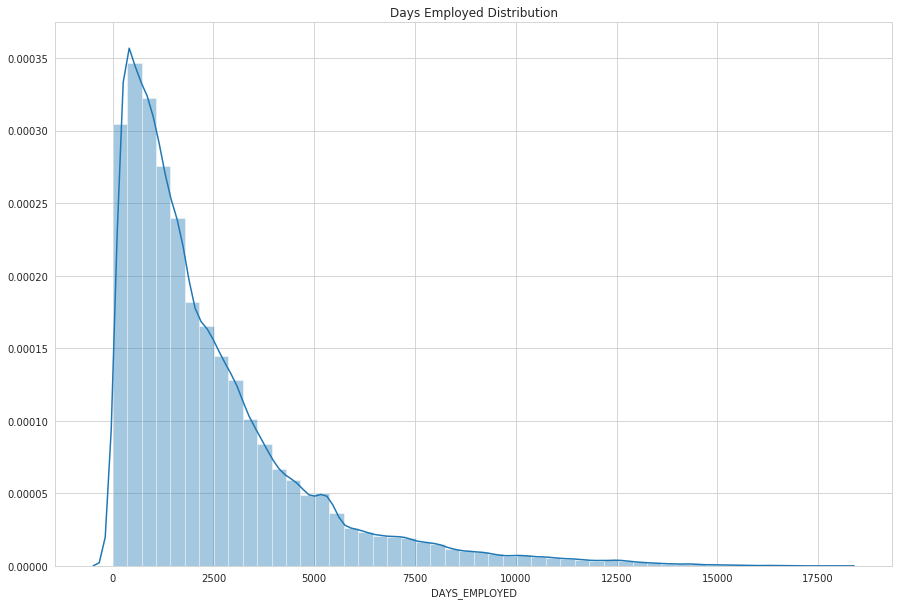

In [58]:
# plot the distribution of days employed
plot_general_dist(df_merged, 'DAYS_EMPLOYED', 'Days Employed Distribution', 'days_employed_dist(cleaned).png')

#### 4. DAYS_REGISTRATION

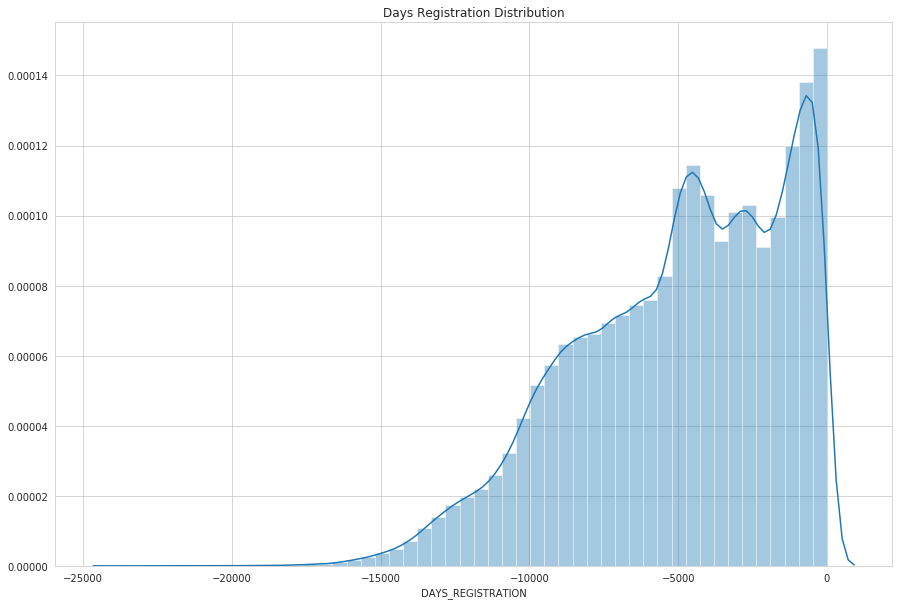

In [59]:
# plot the distribution of days registration
plot_general_dist(df_merged, 'DAYS_REGISTRATION', 'Days Registration Distribution', 'days_registration_dist.png')

In [60]:
df_merged['DAYS_REGISTRATION'].describe([.1,.2,.3,.6,.7,.8,.9,.95,.98,.99,.999])

count    276686.00000
mean      -4986.04817
std        3522.70522
min      -23738.00000
10%       -9930.00000
20%       -8233.00000
30%       -6777.00000
50%       -4501.00000
60%       -3536.00000
70%       -2540.00000
80%       -1492.00000
90%        -690.00000
95%        -330.00000
98%        -118.00000
99%         -50.00000
99.9%        -3.00000
max           0.00000
Name: DAYS_REGISTRATION, dtype: float64

**Comment**: _Days registration cannot be negative. I will set all as absolute._

In [61]:
df_merged['DAYS_REGISTRATION'] = df_merged['DAYS_REGISTRATION'].abs()

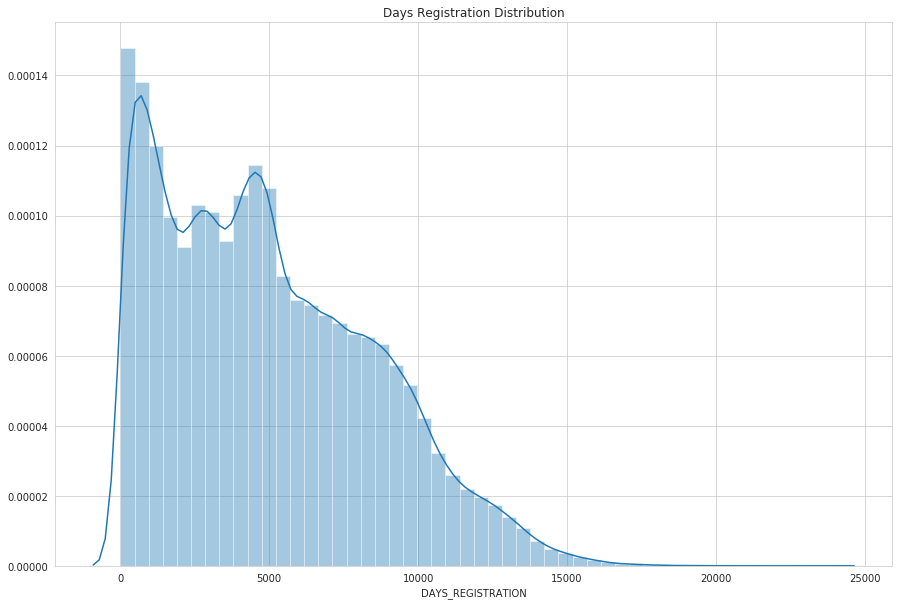

In [62]:
# plot the distribution of days registration
plot_general_dist(df_merged, 'DAYS_REGISTRATION', 'Days Registration Distribution', 'days_registration_dist(cleaned).png')

#### 5. DAYS_ID_PUBLISH

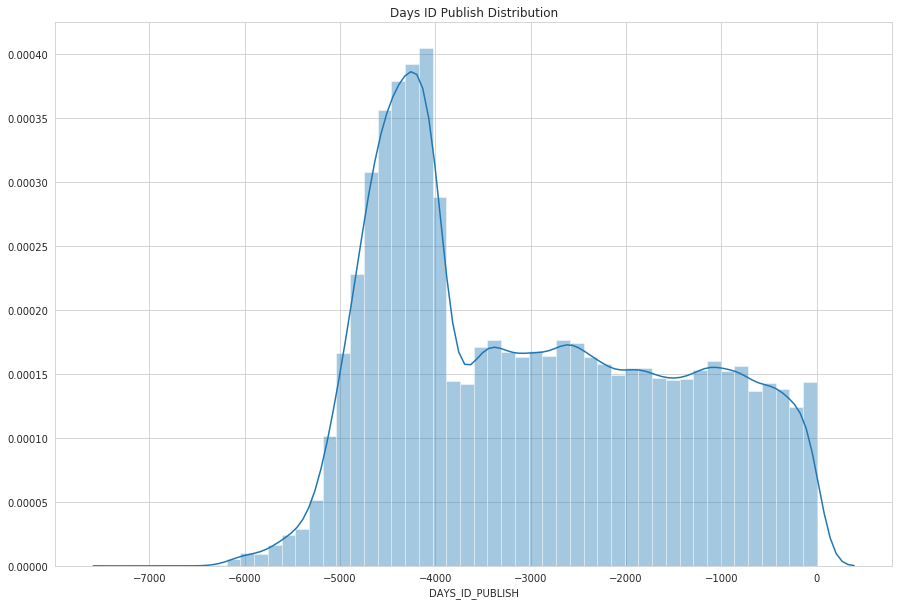

In [63]:
# plot the distribution of days id publish
plot_general_dist(df_merged, 'DAYS_ID_PUBLISH', 'Days ID Publish Distribution', 'days_id_publish_dist.png')

In [64]:
df_merged['DAYS_ID_PUBLISH'].describe([.1,.2,.3,.6,.7,.8,.9,.95,.98,.99,.999])

count    276686.000000
mean      -2993.834484
std        1510.282455
min       -7197.000000
10%       -4724.000000
20%       -4431.000000
30%       -4172.000000
50%       -3254.000000
60%       -2653.000000
70%       -2043.000000
80%       -1377.000000
90%        -728.000000
95%        -374.000000
98%        -139.000000
99%         -61.000000
99.9%        -6.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [65]:
df_merged[df_merged['DAYS_ID_PUBLISH']>0]['DAYS_ID_PUBLISH'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: DAYS_ID_PUBLISH, dtype: float64

**Comment**: _Days id publish cannot be negative. I will set them as absolute._

In [66]:
df_merged['DAYS_ID_PUBLISH'] = df_merged['DAYS_ID_PUBLISH'].abs()

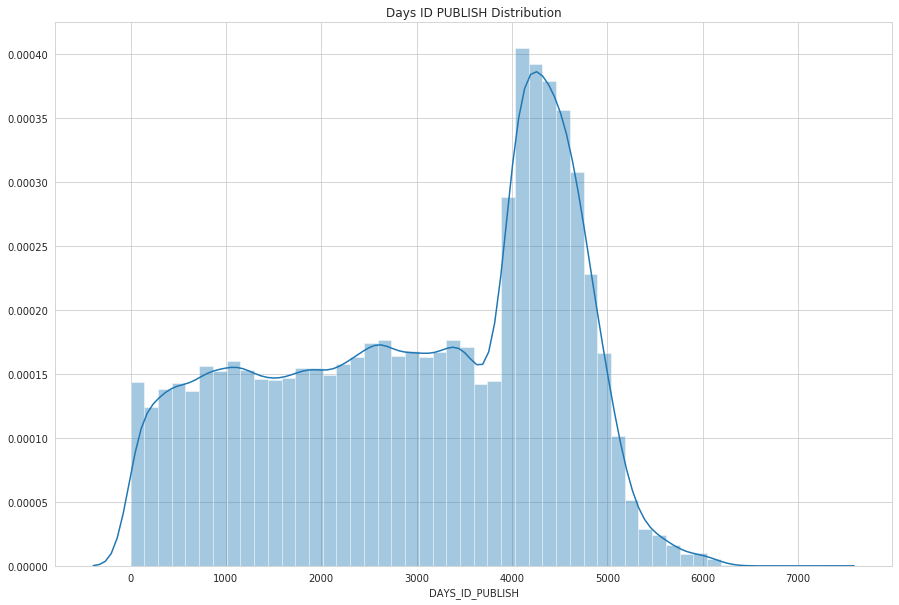

In [70]:
# plot the distribution of days id publish
plot_general_dist(df_merged, 'DAYS_ID_PUBLISH', 'Days ID PUBLISH Distribution', 'days_id_publish_dist(cleaned).png')

### 7. Encoding of the categorical features

In [107]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Separation of columns into numeric and categorical columns
types = np.array([dt for dt in df_merged.dtypes])
all_columns = df_merged.columns.values

is_num = types != object
num_cols = all_columns[is_num]
num_cols = num_cols[num_cols != 'SK_ID_CURR']
num_cols = num_cols[num_cols != 'TARGET']
cat_cols = all_columns[~is_num]

# Featurization of categorical data
imputer_cat = SimpleImputer(strategy='constant', fill_value='MISSING')
df_merged_cat = imputer_cat.fit_transform(df_merged[cat_cols])
df_merged_cat1 = pd.DataFrame(df_merged_cat, columns=cat_cols)

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')


df_merged_cat2 = ohe.fit_transform(df_merged_cat1)
cat_cols_ohe = list(ohe.get_feature_names(input_features=cat_cols))

df_merged_cat_final = pd.DataFrame(df_merged_cat2, columns = cat_cols_ohe)

**Comment**: _As mentioned before, the categorical features don't have high number of unique values, we can use one hot key to do encoding._

### 8. Impute numeric data with Multiple Imputation by Chained Equations(MICE)

In [109]:
# Featurization of numeric data

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler

imputer = IterativeImputer(imputation_order='ascending',max_iter=10,random_state=42,n_nearest_features=None)
df_merged_num = imputer.fit_transform(df_merged[num_cols]) # np.array format

# generate new imputed dataframe
df_merged_num1 = pd.DataFrame(df_merged_num, columns=num_cols)

/home/yao/anaconda3/lib/python3.7/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


### 9. Normalize

In [110]:
scaler_num = StandardScaler()
df_merged_num2 = scaler_num.fit_transform(df_merged_num1)
df_merged_num_final = pd.DataFrame(df_merged_num2, columns=num_cols)

# Final complete data
df_X = pd.concat([df_merged_num_final, df_merged_cat_final], axis = 1)

In [112]:
df_X.to_csv("app_final.csv", index = False)
df_X['TARGET'] = df_merged['TARGET']

df_X.to_csv("app_final(w_target).csv", index = False) # for FFTrees R code

In [113]:
if 'TARGET' in df_X.columns:
    del df_X['TARGET']

## 3. Comparative Model Analysis

In [1]:
import logging

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.info("Start 3. Comparative Model Analysis")

df_merged = pd.read_csv("app_merged.csv", sep = ",")
df_X = pd.read_csv("app_final.csv", sep = ",")
df_y = df_merged['TARGET']

if 'TARGET' in df_X.columns:
    del df_X['TARGET']

INFO:root:Start 3. Comparative Model Analysis
/home/yao/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (122,123,134) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 1. FFT

**Comment**: _FFT has been run with the original FFTrees library in R, the script: r_fftrees.r,
the results can be seen in the presentation._


### 2. Random Forest

In [8]:
import xgboost as xgb
from bayes_opt import BayesianOptimization
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score
import warnings
from sklearn.ensemble import RandomForestClassifier

# search for optimal hyperparameters with bayesian optimization
def rfccv(n_estimators, min_samples_split, max_features):
    return cross_val_score(RandomForestClassifier(n_estimators=int(n_estimators),
                                                  min_samples_split=int(min_samples_split),
                                                  max_features=min(max_features, 0.999)), 
                           df_X, 
                           df_y, 
                           cv=10,
                           scoring="balanced_accuracy", 
                           n_jobs=-1).mean()


rfcBO = BayesianOptimization(rfccv, {'n_estimators': (10, 25),
                                     'min_samples_split': (2, 20),
                                     'max_features': (0.1, 0.999)})

with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    rfcBO.maximize(init_points=2, n_iter=5, acq='ei', xi=0.0)
    
logging.info('-'*100)
logging.info('Final Results')
logging.info('Maximum RF value: %f' % rfcBO.max['target'])
logger.info("Loging dict ---> {0}".format(rfcBO.max['params']))

|   iter    |  target   | max_fe... | min_sa... | n_esti... |
-------------------------------------------------------------
|  1        |  0.677    |  0.8058   |  10.86    |  11.28    |
|  2        |  0.658    |  0.4392   |  14.73    |  23.0     |
|  3        |  0.6634   |  0.7955   |  2.125    |  10.16    |
|  4        |  0.6755   |  0.999    |  20.0     |  10.0     |
|  5        |  0.5993   |  0.1051   |  13.74    |  10.23    |
|  6        |  0.6814   |  0.999    |  2.0      |  25.0     |


INFO:root:----------------------------------------------------------------------------------------------------
INFO:root:Final Results
INFO:root:Maximum RF value: 0.682384
INFO:root:Loging dict ---> {'max_features': 0.999, 'min_samples_split': 6.179633063919984, 'n_estimators': 17.16944237844146}


|  7        |  0.6824   |  0.999    |  6.18     |  17.17    |


In [9]:
max_params = rfcBO.max['params']

rf_final_model = RandomForestClassifier(n_estimators=int(max_params['n_estimators']),
                                             min_samples_split=int(max_params['min_samples_split']),
                                             max_features=min(max_params['max_features'], 0.999))

In [10]:
import time
start_time = time.time()

cv_rf = cross_val_score(rf_final_model, 
                df_X, 
                df_y, 
                cv=10,
                scoring="balanced_accuracy", 
                n_jobs=-1)

elapsed_time = time.time() - start_time

In [11]:
logging.info('Performance: {}, Time passed: {}'.format(cv_rf.mean(), elapsed_time))

INFO:root:Performance: 0.6808341454462148, Time passed: 865.6308138370514


### 3. Gradient Boosting

In [10]:
import xgboost as xgb
from bayes_opt import BayesianOptimization
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score
import warnings

# search for optimal hyperparameters with bayesian optimization
def xgboostcv(max_depth,
              learning_rate,
              n_estimators,
              gamma,
              min_child_weight,
              max_delta_step,
              subsample,
              colsample_bytree,
              reg_alpha,
              reg_lambda,
              silent=True,
              nthread=-1,
              random_state=1):
    return cross_val_score(xgb.XGBClassifier(max_depth=int(max_depth),
                                             learning_rate=learning_rate,
                                             n_estimators=int(n_estimators),
                                             silent=silent,
                                             nthread=nthread,
                                             gamma=gamma,
                                             min_child_weight=min_child_weight,
                                             max_delta_step=max_delta_step,
                                             subsample=subsample,
                                             colsample_bytree=colsample_bytree,
                                             reg_alpha=reg_alpha,
                                             reg_lambda = reg_lambda),
                           df_X,
                           df_y,
                           cv=10,
                           scoring="balanced_accuracy",
                           n_jobs=5).mean()

xgboostBO = BayesianOptimization(xgboostcv,
                                 {'max_depth': (2, 5),
                                  'learning_rate': (0.01, 0.3),
                                  'n_estimators': (1000, 2500),
                                  'gamma': (1., 0.01),
                                  'min_child_weight': (1, 10),
                                  'max_delta_step': (0, 0.1),
                                  'subsample': (0.5, 0.8),
                                  'colsample_bytree' :(0.1, 0.99),
                                  'reg_alpha':(0.1, 0.5),
                                  'reg_lambda':(0.1, 0.9)
                                  })

with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    xgboostBO.maximize(init_points=2, n_iter=5, acq='ei', xi=0.0)

|   iter    |  target   | colsam... |   gamma   | learni... | max_de... | max_depth | min_ch... | n_esti... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------------------
|  1        |  0.7068   |  0.7866   |  0.9039   |  0.1593   |  0.06597  |  3.519    |  9.378    |  1.028e+0 |  0.4921   |  0.2762   |  0.544    |
|  2        |  0.7042   |  0.1488   |  0.1561   |  0.1956   |  0.08049  |  2.175    |  6.809    |  1.418e+0 |  0.1404   |  0.8529   |  0.5673   |
|  3        |  0.7936   |  0.6261   |  0.01     |  0.1762   |  0.09469  |  4.578    |  2.093    |  1e+03    |  0.4862   |  0.3788   |  0.6809   |
|  4        |  0.5007   |  0.3945   |  0.01     |  0.2023   |  0.01289  |  4.1      |  4.145    |  1.001e+0 |  0.2613   |  0.8944   |  0.7349   |
|  5        |  0.5      |  0.5526   |  0.01     |  0.237    |  0.004118 |  3.928    |  4.211    |  1.053e+0 |  0.2562   |  0

In [11]:
logging.info('-'*100)
logging.info('Final Results')
logging.info('Maximum XGBOOST value: %f' % xgboostBO.max['target'])
logger.info("Loging dict ---> {0}".format(xgboostBO.max['params']))

INFO:root:----------------------------------------------------------------------------------------------------
INFO:root:Final Results
INFO:root:Maximum XGBOOST value: 0.812902
INFO:root:Loging dict ---> {'colsample_bytree': 0.9765644375177372, 'gamma': 0.01, 'learning_rate': 0.2299518233390434, 'max_delta_step': 0.09489887493320898, 'max_depth': 3.8106910110224703, 'min_child_weight': 3.1215996464915117, 'n_estimators': 1394.5115176292788, 'reg_alpha': 0.22731283173349268, 'reg_lambda': 0.7559586165504136, 'subsample': 0.7792540333374791}


In [12]:
max_params = xgboostBO.max['params']
max_params['max_depth'] = int(max_params['max_depth'])

xgb_final_model = xgb.XGBClassifier(max_depth=max_params['max_depth'],
                                             learning_rate=max_params['learning_rate'],
                                             n_estimators=int(max_params['n_estimators']),
                                             silent=True,
                                             nthread=-1,
                                             gamma=max_params['gamma'],
                                             min_child_weight=max_params['min_child_weight'],
                                             max_delta_step=max_params['max_delta_step'],
                                             subsample=max_params['subsample'],
                                             colsample_bytree=max_params['colsample_bytree'],
                                             reg_alpha=max_params['reg_alpha'],
                                             reg_lambda = max_params['reg_lambda'])

In [13]:
import time
start_time = time.time()

cv_xgboost = cross_val_score(xgb_final_model, 
                             df_X, 
                             df_y,
                             cv=10,
                             scoring="balanced_accuracy",
                             n_jobs=5)

elapsed_time = time.time() - start_time

In [14]:
logging.info('Performance: {}, Time passed: {}'.format(cv_xgboost.mean(), elapsed_time))

INFO:root:Performance: 0.8129022106655744, Time passed: 4278.80299949646


In [ ]:
# plotting feature importance
max_params = {
    'colsample_bytree': 0.9765644375177372, 
    'gamma': 0.01, 
    'learning_rate': 0.2299518233390434, 
    'max_delta_step': 0.09489887493320898, 
    'max_depth': 3.8106910110224703, 
    'min_child_weight': 3.1215996464915117, 
    'n_estimators': 1394.5115176292788, 
    'reg_alpha': 0.22731283173349268, 
    'reg_lambda': 0.7559586165504136, 
    'subsample': 0.7792540333374791}

xgb_final_model = xgb.XGBClassifier(max_depth=int(max_params['max_depth']),
                                             learning_rate=max_params['learning_rate'],
                                             n_estimators=int(max_params['n_estimators']),
                                             silent=True,
                                             nthread=-1,
                                             gamma=max_params['gamma'],
                                             min_child_weight=max_params['min_child_weight'],
                                             max_delta_step=max_params['max_delta_step'],
                                             subsample=max_params['subsample'],
                                             colsample_bytree=max_params['colsample_bytree'],
                                             reg_alpha=max_params['reg_alpha'],
                                             reg_lambda = max_params['reg_lambda'])

xgb_final_model.fit(df_X, df_y)

# plot the feature importance
feat_imp = pd.DataFrame({'Importance':xgb_final_model.feature_importances_,
                         'Feature': df_X.columns} ).sort_values(ascending=False, by='Importance')

plt.rc('font', size=12)  

fig, axis = plt.subplots(1,1,figsize=(40,15))

feat_imp_top_10 = feat_imp.iloc[:10]
sns.barplot(y='Feature', x='Importance', data=feat_imp_top_10, order=feat_imp_top_10['Feature'].unique(), ax=axis)
axis.set_title('Feature Importance')

plt.savefig("feature_importance.png")